# Support Vector Machine

__Finding a maximum margin hyperplane__


### Setup

$$ \mathcal D = \{(x_i,y_i)\}_{i=1} ^n$$


### Hyperplane and Margin
A hyperplane is a set of data points $\mathcal H_{w,b} ) {x: w^T x + b =0}$.
To find a margin, we firstly need to be able to compute the distance of a point to the hyperplane

1. $\vec w \vec x + b = 0$
2. Let $\vec x_p$ be a point whose distance to $H_{w,b}$ we want to compute: $\vec x_p = \vec x - \vec d$, where $\vec x \in H_{w,b}$
3. $\vec w (\vec x - \vec d) +b = 0$
4. $\vec d= \alpha \vec w$ because d should be paralel to w.


#### Finding $\alpha$
$$ \vec w (\vec x - \alpha \vec w) +b = 0 \implies \alpha = \frac{w^T x + b}{w^T w}$$

#### Finding distance $\vec d$
$$ \vec d = \frac{w^T x + b}{w^T w} * \vec w$$


#### Finding margin $\gamma(w,b,\mathcal D)$

$$ \gamma(w,b,\mathcal D) = min \frac{|w^t x +b|}{w^T w}$$

# SVM objective


### 1. $$ max_{w,b} =  \gamma(w,b,\mathcal D) \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$



### 2. $$ max_{w,b} =  \frac{1}{||w||_2} \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

$w$ is not a function of x. Hence, we can take it out.



### 3. $$ min_{w,b} =  ||w||_2 \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

Instead of maximizing with respect to 1/w, minimize w

### 4. $$ min_{w,b} =  ||w|| \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0 \\ \text{and} \\ \forall i \; min_i |w^T x_i +b|=1$$


__Scale Invariance comes to rescue__ $\gamma(w,b,\mathcal D)=\gamma(\beta w,\beta,\mathcal D) \forall \beta>0$


# 5. $$ argmin_{w,b} ||w|| s.t. \forall (x_i,y_i) \; y_i(w^Tx_i+b)\ge 1 $$
SVM loss function, i.e,. quadratic optimization problem.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

## SVM Loss

$$argmin_{w,b} \; w^T w $$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1$$



## SVM Loss with Slack Variable

$C$ is a hyperparameter
$$argmin_{w,b} \; w^T w \sum_i ^n + \; C \sum_i ^n \xi_i$$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1 - \xi_i\\
\forall i \; \xi_i \ge 0
$$




$$ if  1 - y_i(w^T x_i), \implies \xi= y_i (w^T x_i) $$

$$ if  y_i(w^T x_i)\ge 1 \implies \xi= 0$$

# SVM loss as Hinge loss with l2 norm


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i),0)$$

In [2]:
X, y = make_blobs(25, 2, centers=2, random_state=2, cluster_std=2.4)

3.2408206744706956
1.3970653151635186
1.301997712323201
1.2069492949820062
1.1119008776433077
1.0175443417794536
0.9269527323594553
0.8363166246576386
0.7457250152405996
0.6550889075369026
Acc.: 1.0


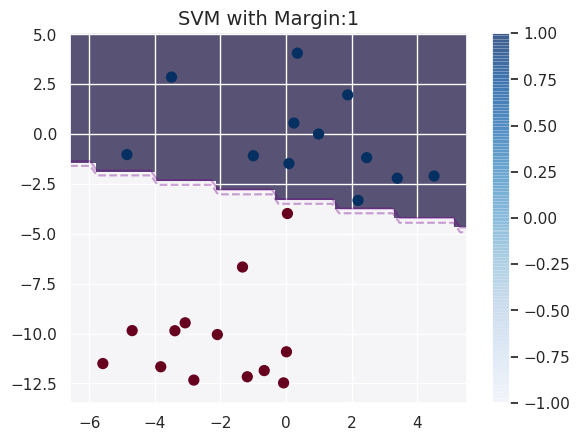

In [3]:
class SVM:
    def __init__(self,margin=1,C=1,reg=0,lr=.0001,iteration=10**6):
        self.margin=margin
        self.C=C
        self.reg=reg
        self.lr=lr
        self.w=None
        self.iteration=iteration
        
    def compute_hinge_loss(self):
        z=self.y*(self.X@self.w)
        
        hinge_loss=np.maximum(self.margin-z,0)
        idx=np.where(hinge_loss > 0)
        dh_loss=-self.y[idx].T@self.X[idx]
        return hinge_loss,dh_loss
    
    def svm_loss(self):
        # (1) Compute the hingle loss
        hinge_loss, dhinge_loss=self.compute_hinge_loss()
        # (2) Compute regularization error
        reg=.5*self.reg*(self.w.T@self.w) 
        # (3) Compute SVM loss: (1) + (2)
        svm_loss=reg+ self.C*hinge_loss.sum()

        # (4) Compute the average the gradient of hinge loss
        dhinge_loss/=self.n
        # (5) Compute gradient of regularization
        dl2=self.reg*self.w
        # (6) Compute derivative of the loss w.r.t. w.
        dw=dhinge_loss+dl2
        return svm_loss, dw
    
    def fit(self,X,y):
        # (1) Add ones to input.
        self.X=np.hstack((X,np.ones((len(X),1))))
        # (2) Add bias into weights.
        self.w=np.random.randn(self.X.shape[1])
        self.y=y
        # (3) number of data points.
        self.n=len(self.X)
        # Convert 0 to -1.
        y[y==0]=-1
        
        for i in range(self.iteration):
            
            #(4) Compute SVM loss and Compute derivative of loss w.r.t. w.
            svm_loss,dw=self.svm_loss()
            # (5) Update w in the negative direction of derivative.
            self.w-=self.lr*dw    
            if i %(self.iteration//10)==0:
                print(svm_loss)
                if svm_loss==0:
                    print('ZERO loss')
                    break
        return self

    def predict(self,X):
        pred=((X@self.w)>0)*1
        pred[pred==0]=-1
        return pred
    
    def plot_decision_boundary(self,X,y):
        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu')
        ax.set_title(f'SVM with Margin:{self.margin}', size=14)
        
        xx_min,xy_min=X.min(axis=0)
        xx_max,xy_max=X.max(axis=0)

        # Visualization works perfectly
        xlim,ylim = (xx_min-1, xx_max+1), (xy_min-1, xy_max+1)
        xg = np.linspace(xlim[0], xlim[1], 60)
        yg = np.linspace(ylim[0], ylim[1], 40)
        xx, yy = np.meshgrid(xg, yg)
        Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
        # Add ones
        Xgrid=np.hstack((Xgrid,np.ones((len(Xgrid),1))))

        for label, color in enumerate(['red', 'blue']):
            Pm=svm.predict(Xgrid)
            c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
            ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-self.margin,0,self.margin],colors=color, alpha=0.2)
        fig.colorbar(c, ax=ax)
        ax.set(xlim=xlim, ylim=ylim)

svm=SVM().fit(X,y)
print('Acc.:',(y==svm.predict(np.hstack((X,np.ones((len(X),1)))))).mean())
svm.plot_decision_boundary(X,y)

[(-8.0, 8.0), (-15.0, 5.0)]

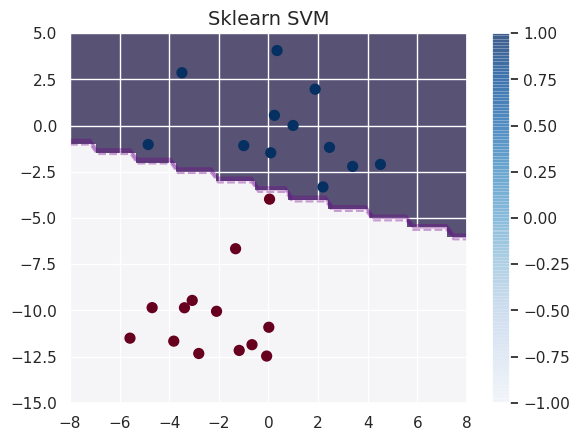

In [4]:
from sklearn.svm import SVC
clf = SVC(degree=1,kernel='linear',shrinking=False)
clf.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Sklearn SVM', size=14)

# Visualization works perfectly
xlim,ylim = (-8, 8), (-15, 5)
xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    Pm=clf.predict(Xgrid)
    c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-.5,0,.5],colors=color, alpha=0.2)
fig.colorbar(c, ax=ax)
ax.set(xlim=xlim, ylim=ylim)

[(-24.94033354259906, 9.031353565900748),
 (-24.94033354259906, 9.031353565900748)]

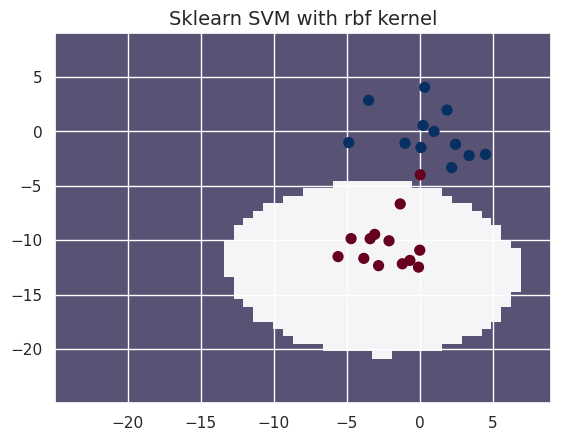

In [5]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Sklearn SVM with rbf kernel', size=14)

# Visualization works perfectly
xlim,ylim = (X.min()*2, X.max()*2), (X.min()*2, X.max()*2)
xg = np.linspace(xlim[0], xlim[1], 50)
yg = np.linspace(ylim[0], ylim[1], 50)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    Pm= clf.predict(Xgrid)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    #ax.contour(xx, yy, P.reshape(xx.shape),levels=[.2,1],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)

/home/demir/anaconda3/envs/pDL/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


48.422023889082105
3.142986803957766
1.7798131543898892
0.8699339102428064
0.5846309079027316
0.3507011526794488
0.11677139745616505
0.04719037007169824
0.0
ZERO loss
Acc.: 1.0


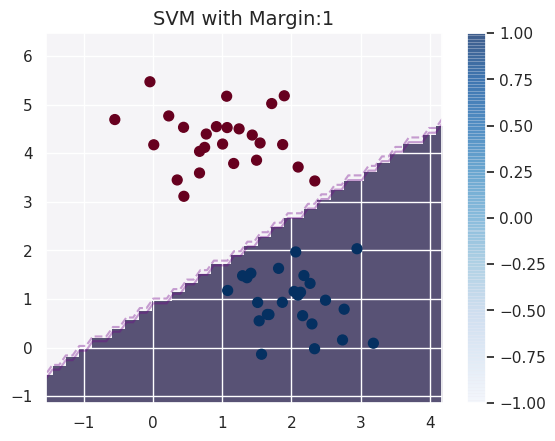

In [6]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

svm=SVM().fit(X,y)
print('Acc.:',(y==svm.predict(np.hstack((X,np.ones((len(X),1)))))).mean())
svm.plot_decision_boundary(X,y)